# Проект: Линейные модели в машинном обучении

Описание проекта
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

## Загрузка данных

In [2544]:
!pip install phik

In [2545]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import spearmanr
import numpy as np
import seaborn as sns
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn. metrics import precision_recall_curve
import phik

In [2546]:
df_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
df_cow = pd.read_csv('/datasets/cow_buy.csv', sep=';')

In [2547]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [2548]:
df_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [2549]:
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [2550]:
df_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [2551]:
df_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [2552]:
df_cow.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Выводы
В таблице с коровами фермера хранится 634 записи. Необходимо заменить типы данных для некоторых столбцов.
Датафрейм с именами отцов коров содержит 629 записей.
В данных о коровах для покупки 20 записей. Необходимо заменить типы данных для некоторых столбцов.
Наименования столбцов во всех датафреймах необходимо изменить.

##  Предобработка данных

In [2553]:
# переименование столбцов
df_main.columns = ['id', 'yield', 'efu', 'raw_protein', 'spr', 'breed', 'type_pasture', 'dad_breed', 'fat_content', 'protein', 'taste_milk', 'age']
df_dad.columns = ['id', 'dad_name']
df_cow.columns = ['breed', 'type_pasture', 'dad_breed', 'dad_name', 'fat_content', 'protein', 'age']

In [2554]:
# количество пропусков
df_main.isna().sum()

id              0
yield           0
efu             0
raw_protein     0
spr             0
breed           0
type_pasture    0
dad_breed       0
fat_content     0
protein         0
taste_milk      0
age             0
dtype: int64

In [2555]:
df_dad.isna().sum()

id          0
dad_name    0
dtype: int64

In [2556]:
df_cow.isna().sum()

breed           0
type_pasture    0
dad_breed       0
dad_name        0
fat_content     0
protein         0
age             0
dtype: int64

In [2557]:
# обработка дубликатов
df_main.duplicated().value_counts()

False    629
True       5
dtype: int64

In [2558]:
df_dad.duplicated().value_counts()

False    629
dtype: int64

In [2559]:
df_cow.duplicated().value_counts()

False    16
True      4
dtype: int64

In [2560]:
df_main = df_main.drop_duplicates(keep='first')
df_main.duplicated().value_counts()

False    629
dtype: int64

In [2561]:
df_cow.duplicated().value_counts()

False    16
True      4
dtype: int64

In [2562]:
# проверка дубликатов в type_pasture
df_main['type_pasture'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [2563]:
# переименование дубликата
df_main.loc[df_main['type_pasture'] == 'Равнинные', 'type_pasture'] = 'Равнинное'

# проверка уникальных значений
df_main['type_pasture'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [2564]:
# проверка дубликатов в dad_breed
df_main['dad_breed'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [2565]:
# переименование дубликата
df_main.loc[df_main['dad_breed'] == 'Айдиалл', 'dad_breed'] = 'Айдиал'

# проверка уникальных значений
df_main['dad_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [2566]:
# проверка дубликатов в dad_name
df_dad['dad_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [2567]:
# проверка дубликатов в type_pasture
df_cow['type_pasture'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [2568]:
# проверка дубликатов в dad_breed
df_cow['dad_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [2569]:
# проверка дубликатов в dad_name
df_cow['dad_name'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [2570]:
# переименование значений df_main
df_main.loc[df_main['breed'] == 'РефлешнСоверинг', 'breed'] = 'Рефлешн Соверинг'
for columns in ['breed', 'type_pasture', 'dad_breed', 'taste_milk']:
    df_main[columns] = df_main[columns].str.lower()

# переименование значений df_dad
for columns in ['dad_name']:
    df_dad[columns] = df_dad[columns].str.lower()

# переименование значений df_cow
df_cow.loc[df_cow['breed'] == 'РефлешнСоверинг', 'breed'] = 'Рефлешн Соверинг'
for columns in ['breed', 'type_pasture', 'dad_breed', 'dad_name']:
    df_cow[columns] = df_cow[columns].str.lower()

In [2571]:
df_main.sort_values(by='yield', ascending=False).head()

,id,yield,efu,raw_protein,spr,breed,type_pasture,dad_breed,fat_content,protein,taste_milk,age
16,17,45616,"11,5",1675,"0,93",вис бик айдиал,холмистое,айдиал,"3,22","3,076",вкусно,более_2_лет
70,71,7222,"16,8",2157,"0,95",вис бик айдиал,холмистое,айдиал,"3,7","3,076",вкусно,более_2_лет
135,136,7207,"16,6",2343,"0,94",вис бик айдиал,холмистое,айдиал,"3,72","3,078",вкусно,более_2_лет
296,297,7201,"15,8",2077,"0,94",рефлешн соверинг,холмистое,айдиал,"3,71","3,072",вкусно,более_2_лет
294,295,7197,"15,6",2241,"0,94",рефлешн соверинг,холмистое,айдиал,"3,71","3,075",вкусно,более_2_лет


In [2572]:
df_main = df_main[df_main['yield'] < 8000]
df_dad = df_dad[~(df_dad['id'] == 17)]

In [2573]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            628 non-null    int64 
 1   yield         628 non-null    int64 
 2   efu           628 non-null    object
 3   raw_protein   628 non-null    int64 
 4   spr           628 non-null    object
 5   breed         628 non-null    object
 6   type_pasture  628 non-null    object
 7   dad_breed     628 non-null    object
 8   fat_content   628 non-null    object
 9   protein       628 non-null    object
 10  taste_milk    628 non-null    object
 11  age           628 non-null    object
dtypes: int64(3), object(9)
memory usage: 63.8+ KB


In [2574]:
df_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   breed         20 non-null     object
 1   type_pasture  20 non-null     object
 2   dad_breed     20 non-null     object
 3   dad_name      20 non-null     object
 4   fat_content   20 non-null     object
 5   protein       20 non-null     object
 6   age           20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [2575]:
# изменение типов данных в df_main
df_main['fat_content'] = df_main['fat_content'].apply(lambda x: x.replace(',', '.'))
df_main['fat_content'] = df_main['fat_content'].astype(float)
df_main['protein'] = df_main['protein'].apply(lambda x: x.replace(',', '.'))
df_main['protein'] = df_main['protein'].astype(float)
df_main['efu'] = df_main['efu'].apply(lambda x: x.replace(',', '.'))
df_main['efu'] = df_main['efu'].astype(float)
df_main['spr'] = df_main['spr'].apply(lambda x: x.replace(',', '.'))
df_main['spr'] = df_main['spr'].astype(float)

# изменение типов данных в df_cow
df_cow['fat_content'] = df_cow['fat_content'].apply(lambda x: x.replace(',', '.'))
df_cow['fat_content'] = df_cow['fat_content'].astype(float)
df_cow['protein'] = df_cow['protein'].apply(lambda x: x.replace(',', '.'))
df_cow['protein'] = df_cow['protein'].astype(float)

In [2576]:
# проверка типов данных
print(df_main.info())
df_cow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            628 non-null    int64  
 1   yield         628 non-null    int64  
 2   efu           628 non-null    float64
 3   raw_protein   628 non-null    int64  
 4   spr           628 non-null    float64
 5   breed         628 non-null    object 
 6   type_pasture  628 non-null    object 
 7   dad_breed     628 non-null    object 
 8   fat_content   628 non-null    float64
 9   protein       628 non-null    float64
 10  taste_milk    628 non-null    object 
 11  age           628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         20 non-null     ob

Изменены названия столбцов. Среди данных были дубликаты.
Дубликаты были исправлены.
Типы данных исправлены.

## Исследовательский анализ данных

In [2577]:
df_main.describe()

,id,yield,efu,raw_protein,spr,fat_content,protein
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [2578]:
def get_plt_num(df, column, title):
    sns.set(rc={"figure.figsize": (15, 5)})

    fig,axes=plt.subplots(1,2)

    sns.histplot(data=df[column], bins=20, ax=axes[0])
    axes[0].set(ylabel='Количество коров', xlabel=column)

    sns.boxplot(data=df[column], ax=axes[1])
    axes[1].set(ylabel=column)

    plt.suptitle(title)
    plt.show()

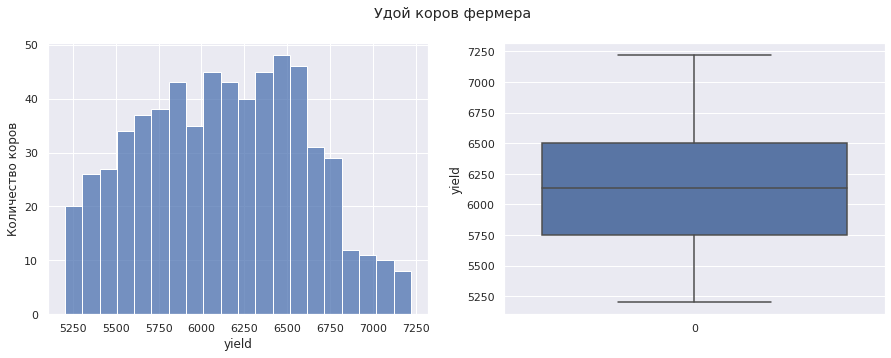

In [2579]:
get_plt_num(df_main, 'yield', 'Удой коров фермера')

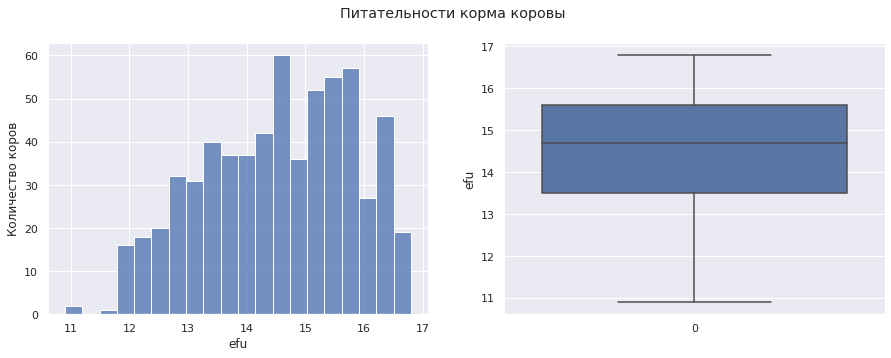

In [2580]:
get_plt_num(df_main, 'efu', 'Питательности корма коровы')

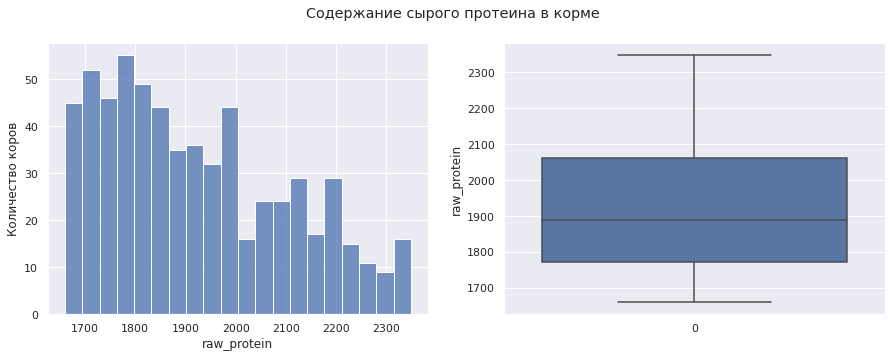

In [2581]:
get_plt_num(df_main, 'raw_protein', 'Содержание сырого протеина в корме')

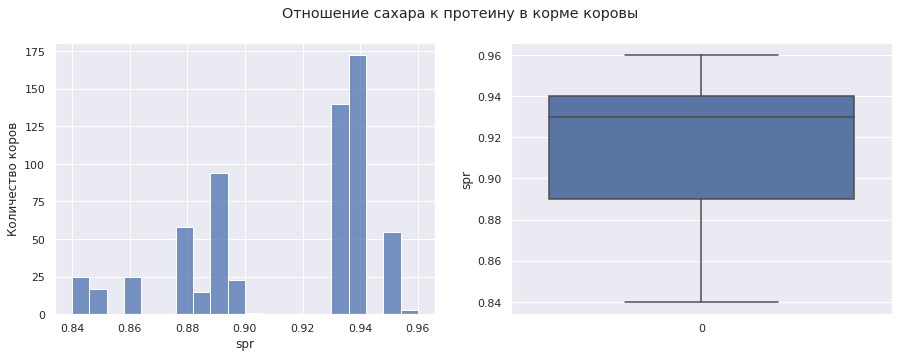

In [2582]:
get_plt_num(df_main, 'spr', 'Отношение сахара к протеину в корме коровы')

In [2583]:
def get_plt_cat(df, column, title):
    sns.countplot(data = df, x=column)

    plt.suptitle(title)
    plt.show()

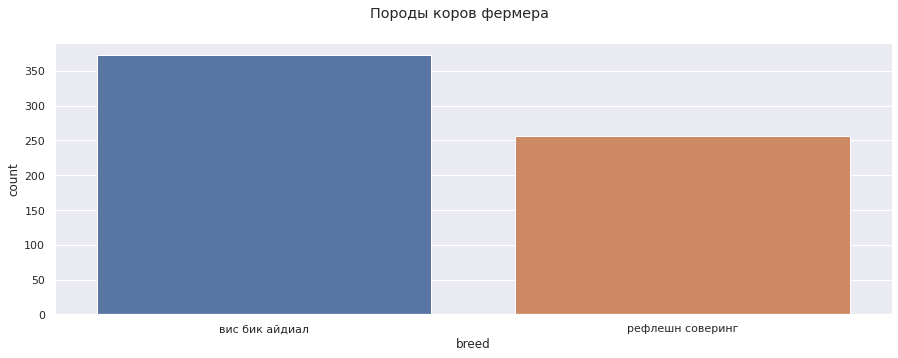

In [2584]:
get_plt_cat(df_main, 'breed', 'Породы коров фермера')

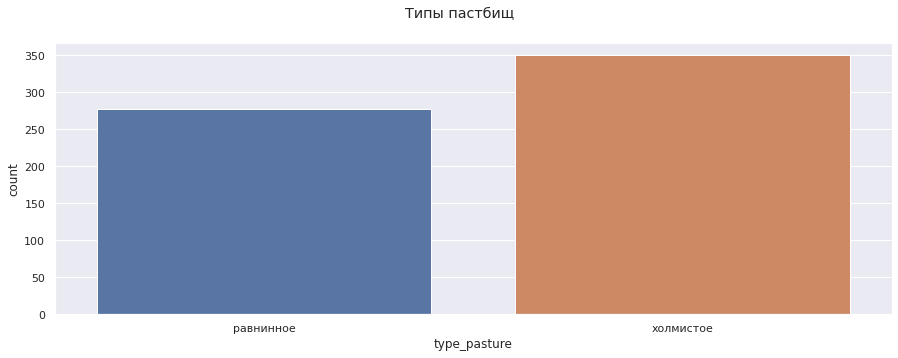

In [2585]:
get_plt_cat(df_main, 'type_pasture', 'Типы пастбищ')

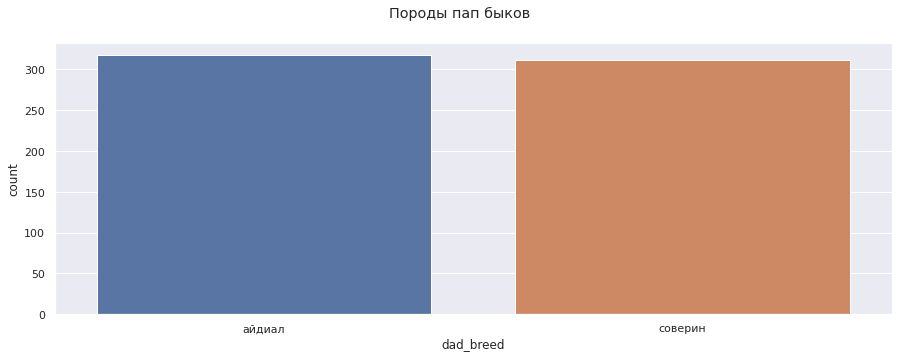

In [2586]:
get_plt_cat(df_main, 'dad_breed', 'Породы пап быков')

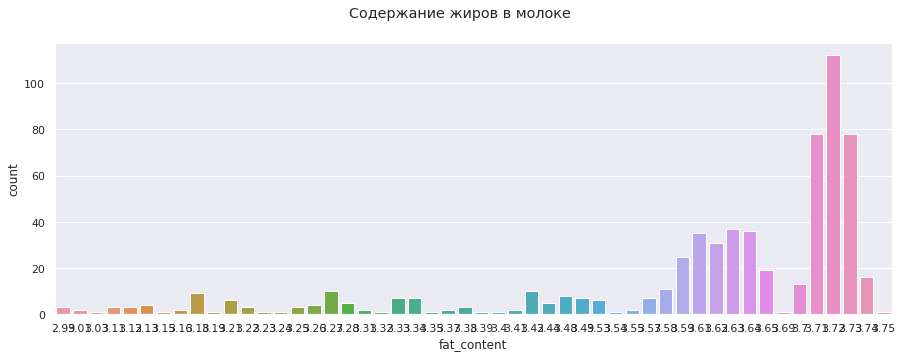

In [2587]:
get_plt_cat(df_main, 'fat_content', 'Содержание жиров в молоке')

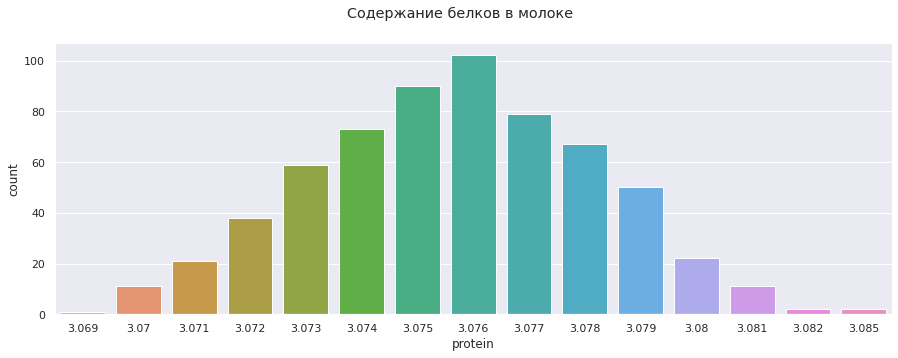

In [2588]:
get_plt_cat(df_main, 'protein', 'Содержание белков в молоке')

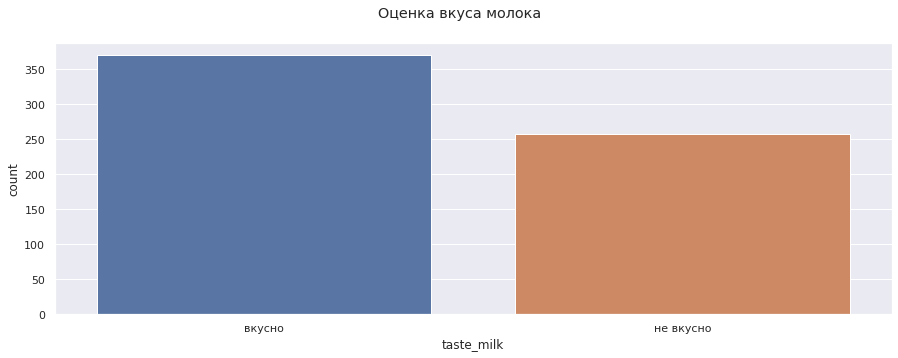

In [2589]:
get_plt_cat(df_main, 'taste_milk', 'Оценка вкуса молока')

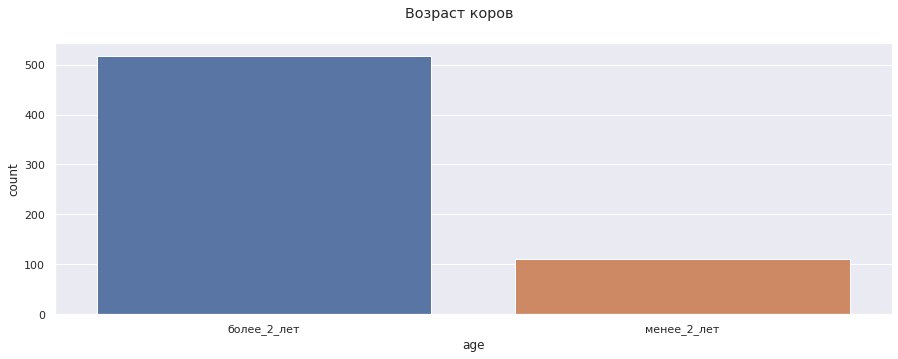

In [2590]:
get_plt_cat(df_main, 'age', 'Возраст коров')

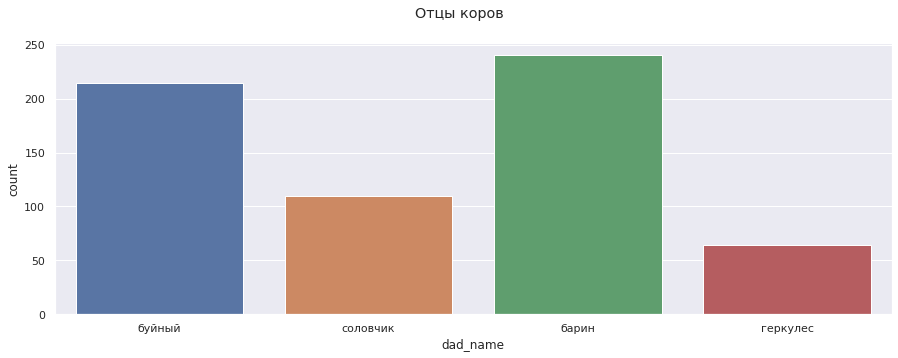

In [2591]:
get_plt_cat(df_dad, 'dad_name', 'Отцы коров')

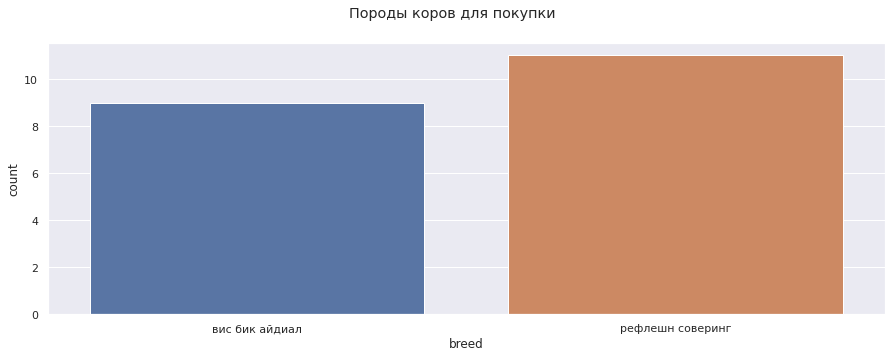

In [2592]:
get_plt_cat(df_cow, 'breed', 'Породы коров для покупки')

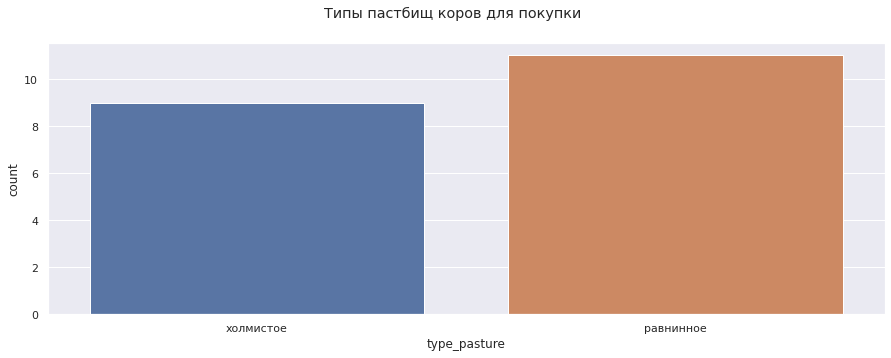

In [2593]:
get_plt_cat(df_cow, 'type_pasture', 'Типы пастбищ коров для покупки')

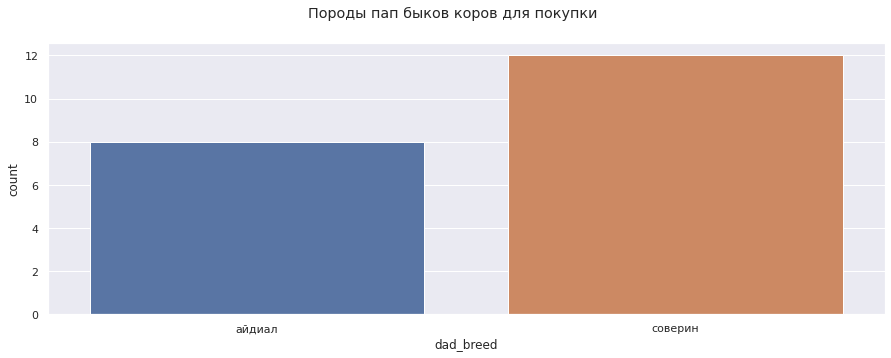

In [2594]:
get_plt_cat(df_cow, 'dad_breed', 'Породы пап быков коров для покупки')

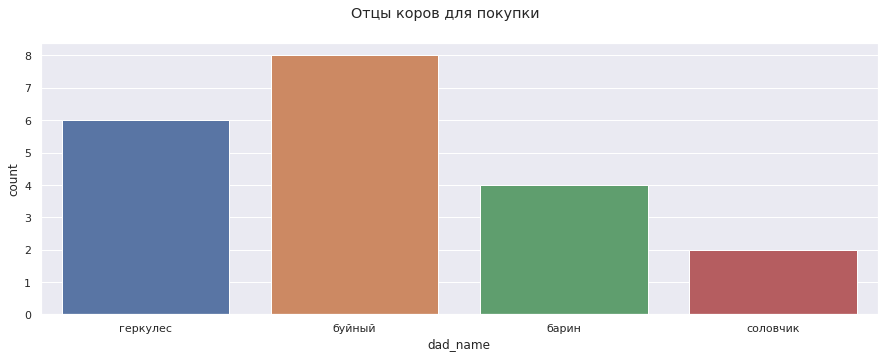

In [2595]:
get_plt_cat(df_cow, 'dad_name', 'Отцы коров для покупки')

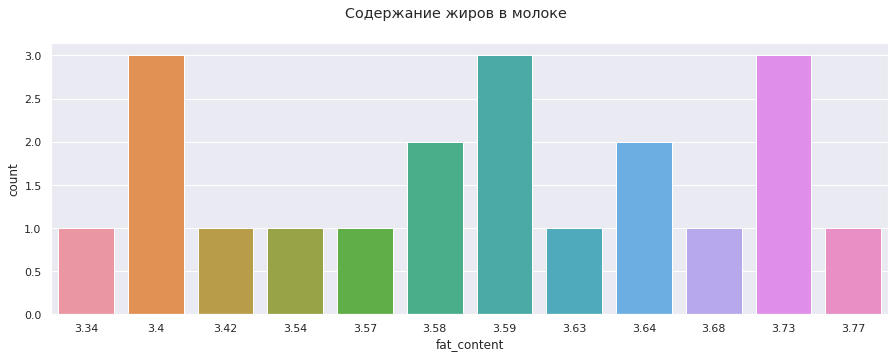

In [2596]:
get_plt_cat(df_cow, 'fat_content', 'Содержание жиров в молоке')

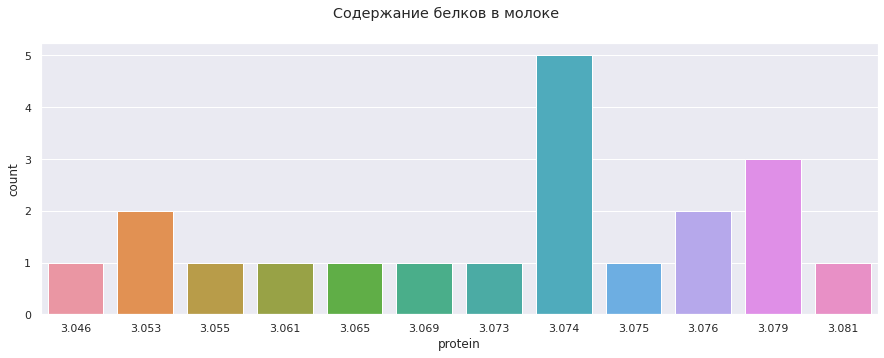

In [2597]:
get_plt_cat(df_cow, 'protein', 'Содержание белков в молоке')

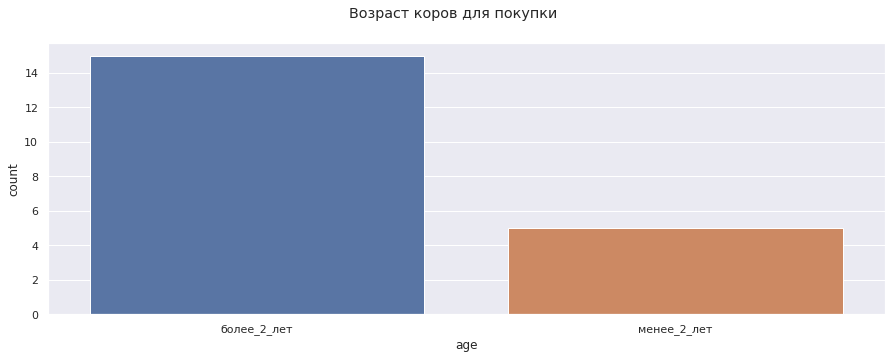

In [2598]:
get_plt_cat(df_cow, 'age', 'Возраст коров для покупки')

Средний удой коров более 6000 кг
График ЭКЕ смещен в право, среднее значение 14.7
График сырого протеина в коре коров смещен влево, среднее значнеие около 1900
Отношение протеина к сахару разделено на 2 части более и менее 0.93
Типы пасдбищ, пород, пород отцов распределены поровну
Содержание жира в молоке в среднем 3.65
Содержание белков в молоке распределено ормально, среднее значнеие 3
Вкусное молоко дает большая часть коров фермера
Больше всего коров старше 2 лет
Данные о коровах для покупки схожи с данными о коровах фермера

## Корреляционный анализ

In [2599]:
# изучим коэффициенты корреляции

def spearmanr_corr(column_1, column_2):
    colors = {'вис бик айдиал': 'blue', 'рефлешн соверинг': 'orange'}
    plt.figure(figsize=(7,7))
    for breed, color in colors.items():
        filtered_data = df_main[df_main['breed'] == breed]
        plt.scatter(column_1, column_2, data=filtered_data, color=color)
        rho, p = spearmanr(
            df_main.loc[df_main['breed'] == breed, column_1],
            df_main.loc[df_main['breed'] == breed, column_2]
        )
        print(f'''Корреляция Спирмена между {column_1} и {column_2} для породы {breed}: {rho.round(2)}
        Значение p: {p}
        ''')
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.legend(list(colors.keys()))
    plt.show()


def pearson_corr(column_1, column_2):
    colors = {'вис бик айдиал': 'blue', 'рефлешн соверинг': 'orange'}
    plt.figure(figsize=(7,7))
    for breed, color in colors.items():
        filtered_data = df_main[df_main['breed'] == breed]
        plt.scatter(column_1, column_2, data=filtered_data, color=color)
        print(f'''Корреляция между {column_1} и {column_2} для {breed}:\
        {df_main.loc[df_main['breed'] == breed, column_1].corr(df_main[column_2]).round(2)}
        ''')
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.legend(list(colors.keys()))
    plt.show()

Корреляция между yield и raw_protein для вис бик айдиал:        0.42
        
Корреляция между yield и raw_protein для рефлешн соверинг:        0.48
        


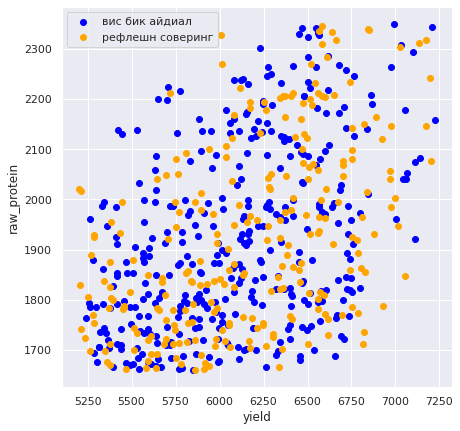

In [2600]:
pearson_corr('yield', 'raw_protein')

Корреляция между yield и efu для вис бик айдиал:        0.77
        
Корреляция между yield и efu для рефлешн соверинг:        0.76
        


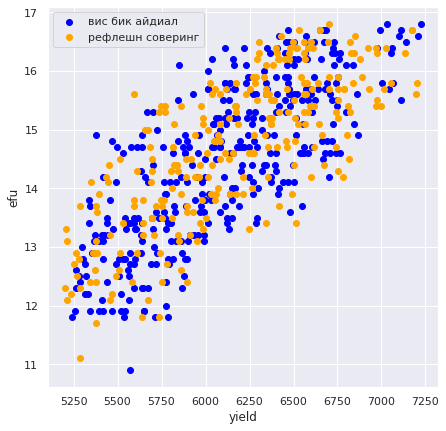

In [2601]:
pearson_corr('yield', 'efu')

Корреляция между yield и efu_sq для вис бик айдиал:        0.77
        
Корреляция между yield и efu_sq для рефлешн соверинг:        0.76
        


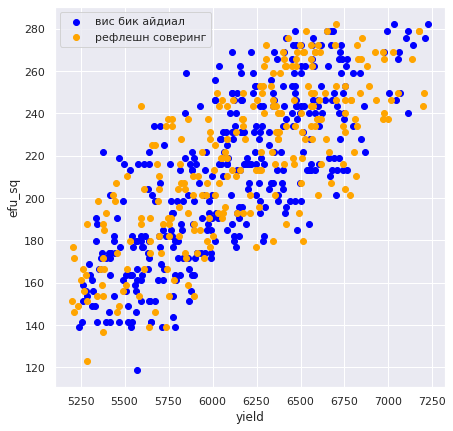

In [2602]:
df_main['efu_sq'] = df_main['efu']**2
pearson_corr('yield', 'efu_sq')

Корреляция Спирмена между yield и spr для породы вис бик айдиал: 0.79
        Значение p: 1.8200547071843682e-81
        
Корреляция Спирмена между yield и spr для породы рефлешн соверинг: 0.77
        Значение p: 2.043051132699784e-52
        


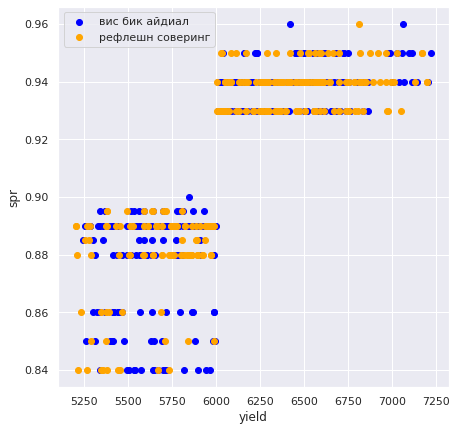

In [2603]:
spearmanr_corr('yield', 'spr')

Корреляция Спирмена между yield и fat_content для породы вис бик айдиал: 0.71
        Значение p: 1.0175606689737748e-58
        
Корреляция Спирмена между yield и fat_content для породы рефлешн соверинг: 0.64
        Значение p: 2.0357435146794884e-31
        


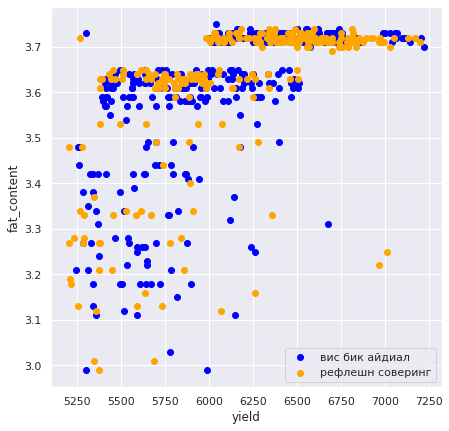

In [2604]:
spearmanr_corr('yield', 'fat_content')

Корреляция Спирмена между yield и protein для породы вис бик айдиал: 0.02
        Значение p: 0.6410678375662311
        
Корреляция Спирмена между yield и protein для породы рефлешн соверинг: 0.01
        Значение p: 0.8887341394242578
        


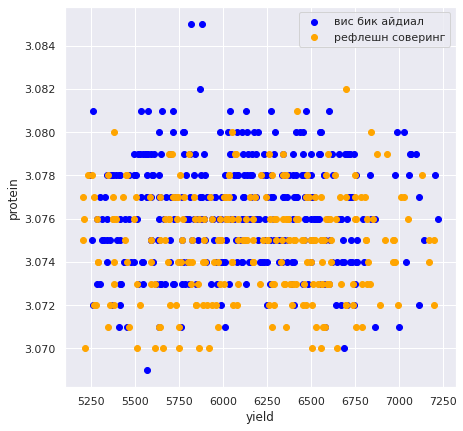

In [2605]:
spearmanr_corr('yield', 'protein')

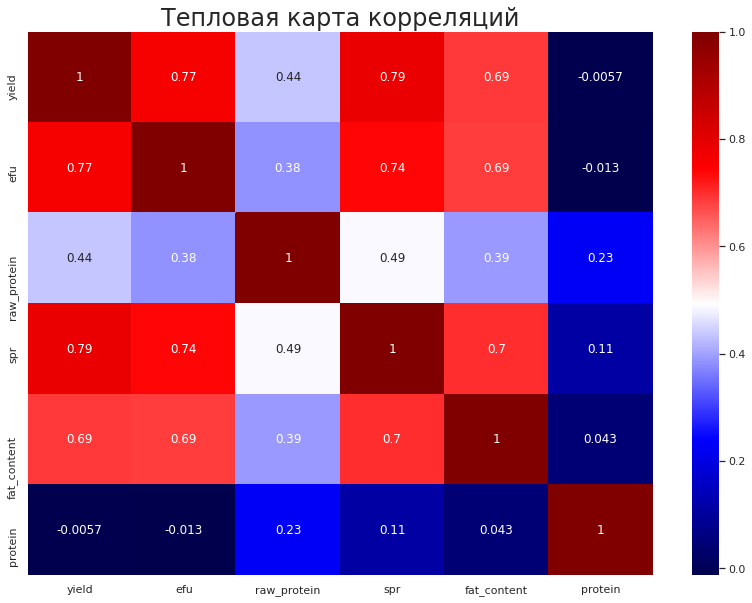

In [2606]:
plt.figure(figsize=(14,10))
sns.heatmap(df_main[['yield', 'efu', 'raw_protein', 'spr', 'fat_content', 'protein']].corr(method='spearman'), annot=True, cmap='seismic')
plt.title('Тепловая карта корреляций', fontsize=24)
plt.show()

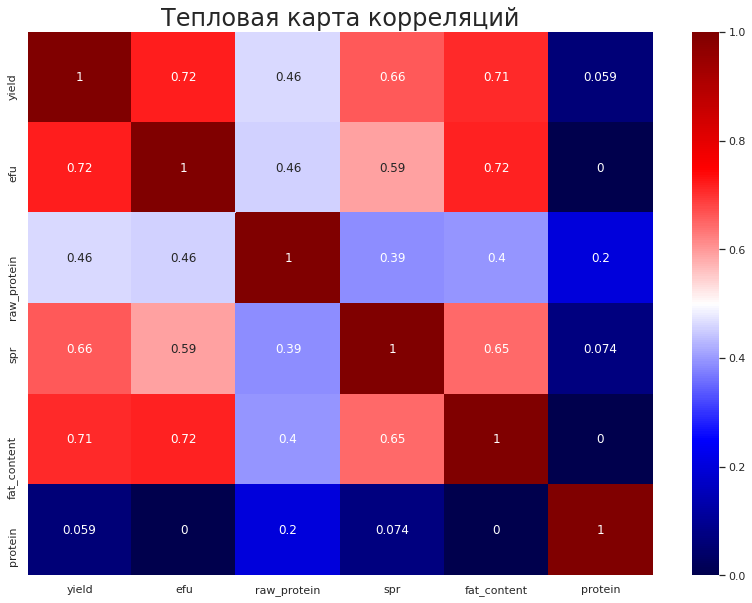

In [2607]:
plt.figure(figsize=(14,10))
sns.heatmap(df_main[['yield', 'efu', 'raw_protein', 'spr', 'fat_content', 'protein']].phik_matrix(
interval_cols=['yield', 'efu', 'raw_protein', 'spr', 'fat_content', 'protein']), annot=True, cmap='seismic')
plt.title('Тепловая карта корреляций', fontsize=24)
plt.show()

1.Связь между ('yield', 'spr') - тенденция к кластеризации.
2.Связь между ('yield', 'fat_content') - квадратичная зависимость.
3.В остальном - сильная или слаба линейная связь.

## Обучение модели линейной регрессии

In [2608]:
# обоучение первой модели

In [2609]:
def model(df, y, cat_col_names, num_col_names):
    RANDOM_STATE = 42

    X = df.drop(y, axis=1)
    y = df[y]

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        random_state=RANDOM_STATE
    )

    # подготовка признаков (масштабирование и кодирование)
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])

    encoder_col_names = encoder.get_feature_names()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    # обучение модели и получение предсказаний на тестовых данных
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)

    predictions = model_lr.predict(X_test)

    return [X_train, X_test, y_train, y_test, predictions, encoder, scaler, model_lr]
def R2(model, df, y, cat_col_names, num_col_names):
    model_m = model(df, y, cat_col_names, num_col_names)
    r2 = r2_score(model_m[3], model_m[4]).round(2)
    return r2
def quality_model(model, df, y, cat_col_names, num_col_names):
    # анализ остатков
    model_m = model(df, y, cat_col_names, num_col_names)
    residuals = model_m[3] - model_m[4]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(model_m[4], residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
def MSE(model, df, y, cat_col_names, num_col_names):
    model_m = model(df, y, cat_col_names, num_col_names)
    mse = mean_squared_error(model_m[3], model_m[4]).round(2)

    return mse
def MAE(model, df, y, cat_col_names, num_col_names):
    model_m = model(df, y, cat_col_names, num_col_names)
    mae = mean_absolute_error(model_m[3], model_m[4]).round(2)

    return mae
def RSME(model, df, y, cat_col_names, num_col_names):
    model_m = model(df, y, cat_col_names, num_col_names)
    rsme = mean_squared_error(model_m[3], model_m[4], squared=False).round(2)

    return rsme

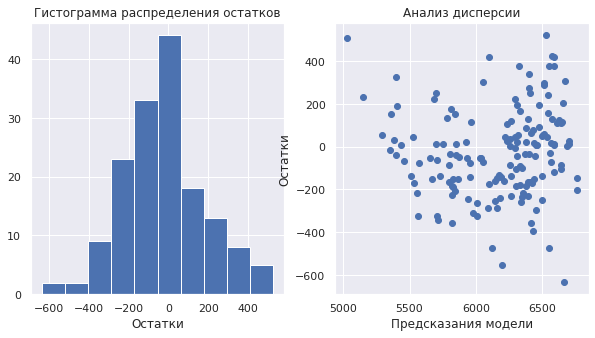

R2: 0.78
MSE: 43887.02
MAE: 164.24
RSME: 209.49


In [2610]:
df = df_main
y = 'yield'
cat_col_names = ['breed', 'type_pasture', 'dad_breed', 'age']
num_col_names = ['efu', 'spr', 'raw_protein']

quality_model(model, df, y, cat_col_names, num_col_names)
print('R2:', R2(model, df, y, cat_col_names, num_col_names))
print('MSE:', MSE(model, df, y, cat_col_names, num_col_names))
print('MAE:', MAE(model, df, y, cat_col_names, num_col_names))
print('RSME:', RSME(model, df, y, cat_col_names, num_col_names))

Модель недостаточно точно предсказывает целевой признак.
Анализ дисперсии показывает, что остатки распределены неравномерно.

In [2611]:
# обоучение второй модели

In [2612]:
df_main_model = df_main[:]

# замена spr на бинарный тип
df_main_model['spr'] = df_main_model['spr'].apply(lambda x: 'более_0.92' if x > 0.9 else 'менее_0.92')

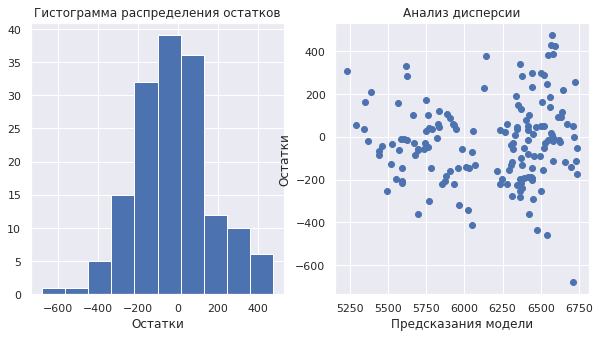

R2: 0.82
MSE: 37030.91
MAE: 149.04
RSME: 192.43


In [2613]:
df = df_main_model
y = 'yield'
cat_col_names = ['breed', 'type_pasture', 'dad_breed', 'age', 'spr']
num_col_names = ['efu_sq', 'raw_protein']

quality_model(model, df, y, cat_col_names, num_col_names)
print('R2:', R2(model, df, y, cat_col_names, num_col_names))
print('MSE:', MSE(model, df, y, cat_col_names, num_col_names))
print('MAE:', MAE(model, df, y, cat_col_names, num_col_names))
print('RSME:', RSME(model, df, y, cat_col_names, num_col_names))

Остатки распределены более равномерно, чем в прошлой модели, но небольшое смещение все еще присутствует.
Дисперсия остатков все еще неравномерная и на больших значениях увеличивается.

In [2614]:
# обоучение третьей модели

In [2615]:
# добавление столбца с именами пап коров
df_main_model = df_main_model.merge(df_dad, on='id')

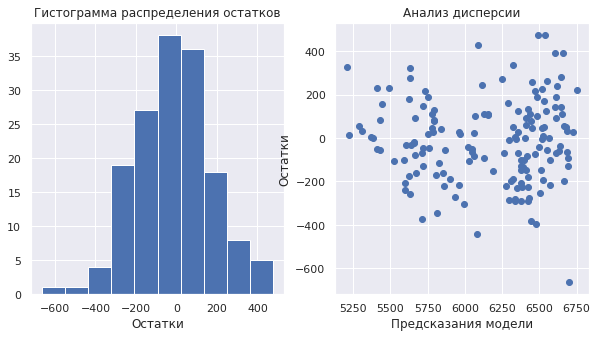

R2: 0.82
MSE: 36370.74
MAE: 150.2
RSME: 190.71


In [2616]:
df = df_main_model
cat_col_names = ['breed', 'type_pasture', 'dad_breed', 'age', 'spr', 'dad_name']
num_col_names = ['efu_sq', 'fat_content']

quality_model(model, df, y, cat_col_names, num_col_names)
print('R2:', R2(model, df, y, cat_col_names, num_col_names))
print('MSE:', MSE(model, df, y, cat_col_names, num_col_names))
print('MAE:', MAE(model, df, y, cat_col_names, num_col_names))
print('RSME:', RSME(model, df, y, cat_col_names, num_col_names))

In [2617]:
model_m = model(df, y, cat_col_names, num_col_names)
interval = st.norm.interval(confidence= 0.95 , loc=np.mean(model_m[4]), scale=st.sem(model_m[4]))

print(f'Доверительный интервал модели: {interval[0].round(2)} - {interval[1].round(2)}')

Доверительный интервал модели: 6090.78 - 6219.07


Итого: сопоставив значения R2, последняя модель является более точной. 
Значение R2 = 0.82. Анализ данных метрик MSE, MAE, RMSE демонстрируют минимальные значения в этой третьей модели.
Остатки распределены нормально, а их дисперся наиболее равномерна на больших и малых значениях.

In [2618]:
# прогноз удоя коров

In [2619]:
# добавление ЭКЕ, увеличенного на 5%, в df_cow
df_cow['efu'] = (df_main_model['efu'].mean() * 1.05).round(2)
# возведение ЭКЕ в квадрат
df_cow['efu_sq'] = (df_cow['efu']**2).round(2)
df_cow['raw_protein'] = (df_main_model['raw_protein'].mean() * 1.05).round(2)
df_cow['spr'] = df_main['spr'].mean() * 1.05

# замена spr на бинарный тип
df_cow['spr_0.9'] = df_cow['spr'].apply(lambda x: 'более_0.9' if x > 0.90 else 'менее_0.9')

In [2620]:
cat_col_names = ['breed', 'type_pasture', 'dad_breed', 'age', 'dad_name']
num_col_names = ['efu_sq', 'raw_protein']

model_m = model(df_main_model, y, cat_col_names, num_col_names)

#RANDOM_STATE = 42

#X = df_main_model.drop('yield', axis=1)
#y = df_main_model['yield']

#X_train, X_test, y_train, y_test = train_test_split(
#    X,
#    y,
#    random_state=RANDOM_STATE
#)
X_cow = df_cow

# подготовка признаков (масштабирование и кодирование)
#encoder = OneHotEncoder(drop='first', sparse=False)
#X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
#X_test_ohe = encoder.transform(X_test[cat_col_names])
X_cow_ohe = model_m[5].transform(X_cow[cat_col_names])

#encoder_col_names = encoder.get_feature_names()

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train[num_col_names])
#X_test_scaled = scaler.transform(X_test[num_col_names])
X_cow_scaled = model_m[6].transform(X_cow[num_col_names])

#X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
#X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

#X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
#X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

encoder_col_names = model_m[5].get_feature_names()
X_cow_ohe = pd.DataFrame(X_cow_ohe, columns=encoder_col_names)
X_cow_scaled = pd.DataFrame(X_cow_scaled, columns=num_col_names)

#X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
#X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
X_cow = pd.concat([X_cow_ohe, X_cow_scaled], axis=1)

# обучение модели и получение предсказаний на тестовых данных
#model_lr  = LinearRegression()
#model_lr.fit(X_train, y_train)

predictions = model_m[7].predict(X_cow).round(2)

for i in range(len(df_cow)):
    df_cow.loc[i,'yield'] = predictions[i]

#[X_train, X_test, y_train, y_test, predictions, encoder, scaler, model_lr]

In [2621]:
df_cow_bay = df_cow[df_cow['yield'] > 6000][:]
df_cow_bay

,breed,type_pasture,dad_breed,dad_name,fat_content,protein,age,efu,efu_sq,raw_protein,spr,spr_0.9,yield
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6573.06
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6279.49
2,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6174.25
3,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6574.01
4,рефлешн соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6519.08
5,рефлешн соверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6308.29
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6573.06
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6529.16
8,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6174.25
9,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6324.34


Построены модели линейной регрессии по данным из датасета farm_main.csv и определена по значениям метрик более точная
Полученное значение коэффициента R2 = 0.82
Применена лучшая по качеству и по точности модель к данным из датасета cow_buy_old.csv и получен прогноз удоя коров
Определены коровы с удоем не менее 6000 кг в год

## Обучение модели логистической регрессии

In [2622]:
# задача классификации

In [2623]:
df_main['taste_milk'] = df_main['taste_milk'].apply(lambda x: 1 if x == 'вкусно' else 0)
df_cow_bay['taste_milk'] = 0
df_main_model.head()

,id,yield,efu,raw_protein,spr,breed,type_pasture,dad_breed,fat_content,protein,taste_milk,age,efu_sq,dad_name
0,1,5863,14.2,1743,менее_0.92,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,201.64,буйный
1,2,5529,12.8,2138,менее_0.92,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,163.84,соловчик
2,3,5810,14.0,1854,менее_0.92,рефлешн соверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,196.00,барин
3,4,5895,12.4,2012,менее_0.92,рефлешн соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,буйный
4,5,5302,12.8,1675,менее_0.92,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,163.84,барин


Accuracy =  0.61
Precision =  0.61
Recall =  0.84


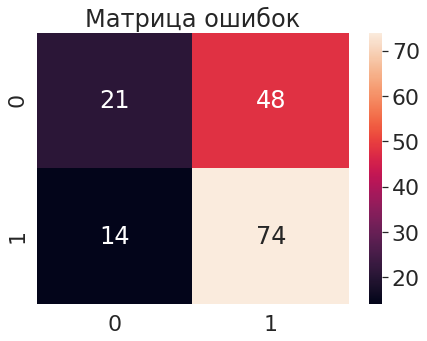

In [2624]:
cat_col_names = ['breed', 'type_pasture', 'dad_breed', 'age']
num_col_names = ['efu', 'raw_protein', 'fat_content' , 'protein', 'spr']

RANDOM_STATE = 42

X = df_main.drop('taste_milk', axis=1)
y = df_main['taste_milk']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred).round(2)
precision = precision_score(y_test, y_pred).round(2)
recall = recall_score(y_test, y_pred).round(2)

plt.figure(figsize = (7,5))
cm = confusion_matrix(y_test, y_pred)

sns.set (font_scale= 2 )
sns.heatmap(cm, annot=True, fmt='d');
plt.title('Матрица ошибок')
print('Accuracy = ',acc)
print('Precision = ',precision)
print('Recall = ',recall)

Модель предсказывает 74 верных положительных значений и 48 не верных положительных
Для минимизации рисков необходимо сократить количество не верных положительных предсказаний, так как фермеру важно получить коров с вкусным молоком и важно не ошибиться с положительными предсказаниями

In [2625]:
cat_col_names = ['breed', 'type_pasture', 'dad_breed', 'age']
num_col_names = ['efu', 'raw_protein', 'fat_content' , 'protein', 'spr']

RANDOM_STATE = 42

X = df_main.drop('taste_milk', axis=1)
y = df_main['taste_milk']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba, y_pred), columns = ['y_valid', 'y_proba', 'y_pred'])\
.sort_values(by='y_proba',ascending=False)

data.head()

,y_valid,y_proba,y_pred
33,0,0.848270,1
17,1,0.827795,1
85,1,0.819878,1
66,1,0.810056,1
95,1,0.790444,1


In [2626]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 1000,endpoint=False)]
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>= i else 0)
data.head()

,y_valid,y_proba,y_pred,y_pred_0.1,y_pred_0.11,y_pred_0.12,y_pred_0.13,y_pred_0.14,y_pred_0.15,y_pred_0.16,...,y_pred_0.91,y_pred_0.92,y_pred_0.93,y_pred_0.94,y_pred_0.95,y_pred_0.96,y_pred_0.97,y_pred_0.98,y_pred_0.99,y_pred_1.0
33,0,0.848270,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
17,1,0.827795,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
85,1,0.819878,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
66,1,0.810056,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
95,1,0.790444,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [2627]:
for i in thresholds:
    cm = confusion_matrix(y_test, data['y_pred_'+str(i)])
    if cm[0][1] == 0:
        print('Порог = ',i ,'Precision = ', round(precision_score(y_test, data['y_pred_'+str(i)]), 2), 'TP =', cm[1][1])
        porog = i
        break

Порог =  0.82 Precision =  1.0 TP = 2


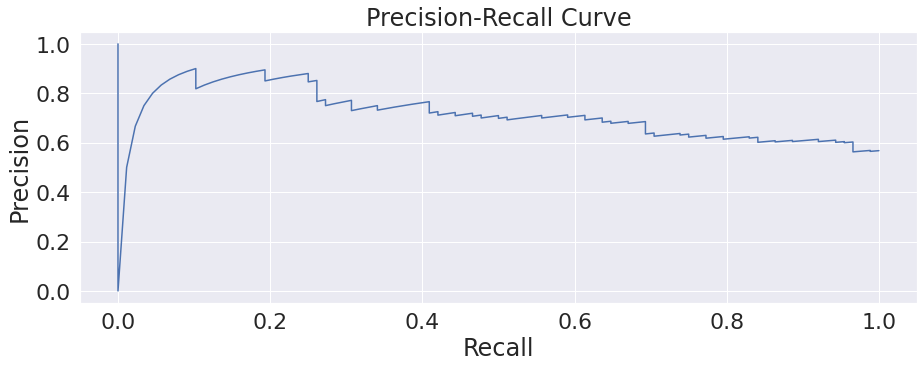

In [2628]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

Accuracy =  0.45
Precision =  1.0
Recall =  0.02


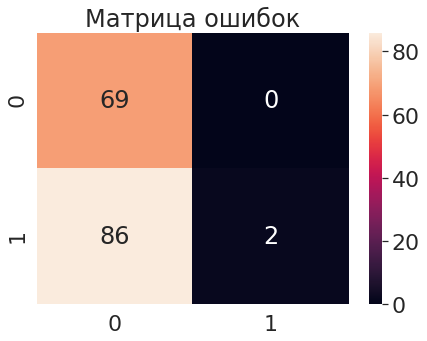

In [2629]:
acc = accuracy_score(y_test, data['y_pred_'+str(porog)]).round(2)
precision = precision_score(y_test, data['y_pred_'+str(porog)]).round(2)
recall = recall_score(y_test, data['y_pred_'+str(porog)]).round(2)

plt.figure(figsize = (7,5))
cm = confusion_matrix(y_test, data['y_pred_'+str(porog)])

sns.set (font_scale= 2 )
sns.heatmap(cm, annot=True, fmt='d');
plt.title('Матрица ошибок')
print('Accuracy = ',acc)
print('Precision = ',precision)
print('Recall = ',recall)

In [2630]:
#cat_col_names = ['breed', 'type_pasture', 'dad_breed', 'age']
#num_col_names = ['efu', 'raw_protein', 'fat_content' , 'protein', 'spr']
#RANDOM_STATE = 42

#X = df_main.drop('taste_milk', axis=1)
#y = df_main['taste_milk']
X_cow = df_cow_bay

#X_train, X_test, y_train, y_test = train_test_split(
#    X,
#    y,
#    random_state=RANDOM_STATE)

#encoder = OneHotEncoder(drop='first', sparse=False)
#X_ohe = encoder.fit_transform(X_train[cat_col_names])
X_cow_ohe = encoder.transform(X_cow[cat_col_names])

#encoder_col_names = encoder.get_feature_names()

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_train[num_col_names])
X_cow_scaled = scaler.transform(X_cow[num_col_names])

#X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
#X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X_cow_ohe = pd.DataFrame(X_cow_ohe, columns=encoder_col_names)
X_cow_scaled = pd.DataFrame(X_cow_scaled, columns=num_col_names)

#X_train = pd.concat([X_ohe, X_scaled], axis=1)
X_cow = pd.concat([X_cow_ohe, X_cow_scaled], axis=1)

#clf = LogisticRegression()
#clf = clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_cow)[:,1]

df_cow_bay['y_pred'] = y_pred

df_cow_bay['taste_milk'] = df_cow_bay['y_pred'].apply(lambda x: 'taste_milk' if x >= porog else 'no_taste_milk')

df_cow_bay = df_cow_bay.sort_values(by = ['y_pred'], ascending = False)
df_cow_bay = df_cow_bay.drop(columns='y_pred')

df_cow_bay

,breed,type_pasture,dad_breed,dad_name,fat_content,protein,age,efu,efu_sq,raw_protein,spr,spr_0.9,yield,taste_milk
9,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6324.34,taste_milk
16,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.079,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6249.58,no_taste_milk
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6279.49,no_taste_milk
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6573.06,no_taste_milk
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6573.06,no_taste_milk
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6529.16,no_taste_milk
8,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6174.25,no_taste_milk
14,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6174.25,no_taste_milk
2,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6174.25,no_taste_milk
4,рефлешн соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6519.08,no_taste_milk


Полученное значение коэффициента детерминации - 0.82
Лучшая по качеству и точности модель к данным и получен прогноз вкуса молока коров
Среди всех коров только одна будет давать 6000 кг вкусного молока

## Итоговые выводы

Изучены данные о коровах фермера.
Обработаны пропуски, дубликаты, аномалии, типы данных, названия столбцов.
Данные исследованы.
В среднем коровы фермера дают более 6000 кг молока.
Проведен корреляционный анализ признаков в датасете ferma_main.csv.

Имеется связь целевого признака "Удоя молока" с признаками: Энергетическая кормовая единица и Сырой протеин.
Связь целевого признака с другими признаками не линейная.
Мультиколинеарность не наблюдается.
Среди коров найдена одна корова, которая сможет дать более 6000 кг вкусного молока.

In [2631]:
df_cow_bay[df_cow_bay['taste_milk'] == 'taste_milk']

,breed,type_pasture,dad_breed,dad_name,fat_content,protein,age,efu,efu_sq,raw_protein,spr,spr_0.9,yield,taste_milk
9,рефлешн соверинг,холмистое,айдиал,буйный,3.4,3.079,менее_2_лет,15.28,233.48,2019.95,0.958744,более_0.9,6324.34,taste_milk
